In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from pathlib import Path
import string

import numpy as np
import pandas as pd 
    
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.path as mpath
from matplotlib import rcParams

import themepy
theme = themepy.Theme('paper')

rcParams['font.family'] = 'Segoe Print'
rcParams['figure.dpi'] = 200



import diagram as dg
import intro_plots as ip
import colorhelp as ch

spath = Path("../deck/figures")

In [4]:
df = pd.read_csv("2645453.csv")

In [5]:
df['NAME'].unique()

array(['HILO INTERNATIONAL AIRPORT 87, HI US',
       'JFK INTERNATIONAL AIRPORT, NY US', 'BARROW AIRPORT, AK US'],
      dtype=object)

In [6]:
df.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT03', 'WT04',
       'WT06', 'WT08', 'WT09'],
      dtype='object')

In [7]:
#df['NAME'].str[:
df['station'] = df['NAME'].str.rsplit('AIRPORT').str[0] + "AIRPORT"

In [8]:
df[['station', 'TAVG', 'PRCP', 'DATE']][df['station'].str.contains('JFK')]

,station,TAVG,PRCP,DATE
190,JFK INTERNATIONAL AIRPORT,2.2,16.0,2021-01-01
191,JFK INTERNATIONAL AIRPORT,5.8,1.8,2021-01-02
192,JFK INTERNATIONAL AIRPORT,3.0,3.0,2021-01-03
193,JFK INTERNATIONAL AIRPORT,3.6,0.3,2021-01-04
194,JFK INTERNATIONAL AIRPORT,3.8,0.0,2021-01-05
...,...,...,...,...
375,JFK INTERNATIONAL AIRPORT,22.6,0.0,2021-07-05
376,JFK INTERNATIONAL AIRPORT,25.3,9.9,2021-07-06
377,JFK INTERNATIONAL AIRPORT,25.4,0.0,2021-07-07
378,JFK INTERNATIONAL AIRPORT,25.1,8.1,2021-07-08


In [135]:
points =  df[['station', 'TAVG', 'PRCP', 'DATE']][df['DATE'].str.contains('2021-07-06')]

In [10]:
points

,station,TAVG,PRCP,DATE
186,HILO INTERNATIONAL AIRPORT,24.3,4.8,2021-07-06
376,JFK INTERNATIONAL AIRPORT,25.3,9.9,2021-07-06
566,BARROW AIRPORT,5.6,0.5,2021-07-06


In [11]:
df[df['station'].str.contains('BARROW')].sort_values(by='PRCP', ascending=False).head()['DATE']

558    2021-06-28
432    2021-02-22
557    2021-06-27
415    2021-02-05
428    2021-02-18
Name: DATE, dtype: object

In [12]:
df[df['station'].str.contains('JFK')].sort_values(by='PRCP', ascending=False).head()['DATE']

221    2021-02-01
373    2021-07-03
337    2021-05-28
339    2021-05-30
205    2021-01-16
Name: DATE, dtype: object

In [13]:
for d in df['DATE']:
    r = df[df['DATE'].str.match(d)][['NAME', 'TAVG','PRCP']]
    if (r['TAVG']>0).all() and (r['PRCP']>0).all():
        print(d, r)

2021-07-03                                      NAME  TAVG  PRCP
183  HILO INTERNATIONAL AIRPORT 87, HI US  24.7   3.8
373      JFK INTERNATIONAL AIRPORT, NY US  17.7  27.9
563                 BARROW AIRPORT, AK US   1.1   1.3
2021-07-06                                      NAME  TAVG  PRCP
186  HILO INTERNATIONAL AIRPORT 87, HI US  24.3   4.8
376      JFK INTERNATIONAL AIRPORT, NY US  25.3   9.9
566                 BARROW AIRPORT, AK US   5.6   0.5
2021-07-03                                      NAME  TAVG  PRCP
183  HILO INTERNATIONAL AIRPORT 87, HI US  24.7   3.8
373      JFK INTERNATIONAL AIRPORT, NY US  17.7  27.9
563                 BARROW AIRPORT, AK US   1.1   1.3
2021-07-06                                      NAME  TAVG  PRCP
186  HILO INTERNATIONAL AIRPORT 87, HI US  24.3   4.8
376      JFK INTERNATIONAL AIRPORT, NY US  25.3   9.9
566                 BARROW AIRPORT, AK US   5.6   0.5
2021-07-03                                      NAME  TAVG  PRCP
183  HILO INTERNATIONAL AIR

In [140]:
points = df[['DATE', 'TAVG', 'PRCP', 'station']][df['DATE']=='2021-07-03']

In [15]:
data = []
for _, row in points.iterrows():
    data.append([('temp', row['TAVG']), ('prcp', row['PRCP']), 
                 ('station', row['station'])])
    
data

[[('temp', 24.7), ('prcp', 3.8), ('station', 'HILO INTERNATIONAL AIRPORT')],
 [('temp', 17.7), ('prcp', 27.9), ('station', 'JFK INTERNATIONAL AIRPORT')],
 [('temp', 1.1), ('prcp', 1.3), ('station', 'BARROW AIRPORT')]]

In [16]:
x = np.array(data).T[1][0].astype(float)
y = np.array(data).T[1][1].astype(float)
c = np.array(data).T[1][2]


In [17]:
yboxes = [0 + .25/2]
for i in range(2):
    yboxes.append(yboxes[i]+1.5*.25)


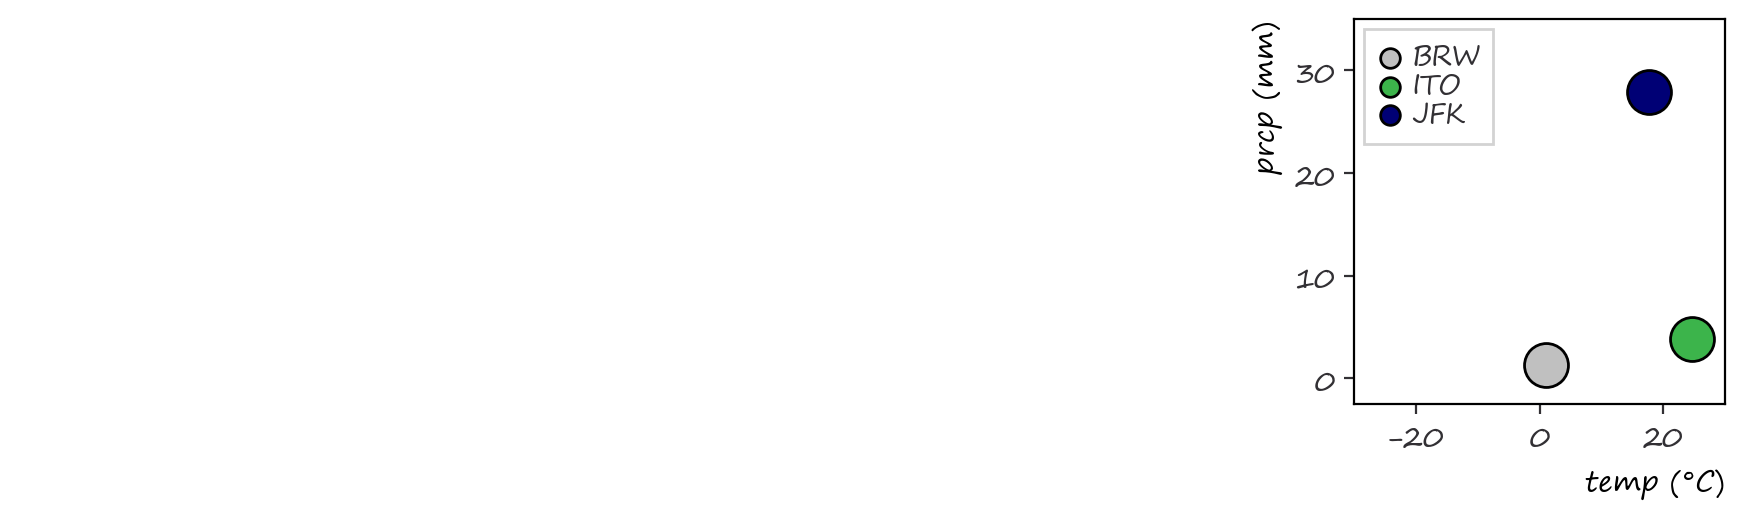

In [43]:
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=data, 
                          plot_type='scatter', 
                          label=None)
dg.fake_legend(axd['H'], ['JFK', 'ITO', 'BRW'])
fig.savefig(spath/"intro01.png", facecolor='white', bbox_inches='tight')
plt.show()

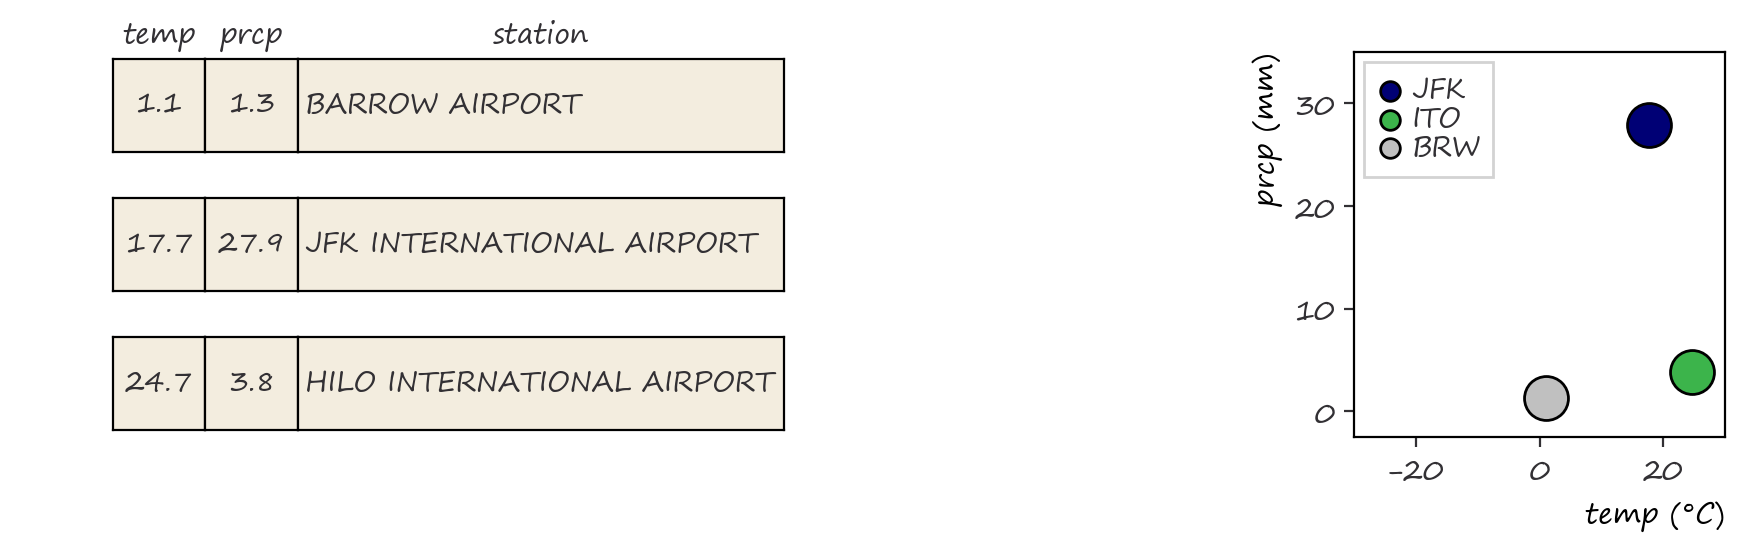

In [45]:
#add forwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=data, 
                          plot_type='scatter', label=None)
dg.table(axd, data)
dg.fake_legend(axd['H'], ['JFK', 'ITO', 'BRW'])

fig.savefig(spath/"intro02a.png", facecolor='white', bbox_inches='tight')


plt.show()

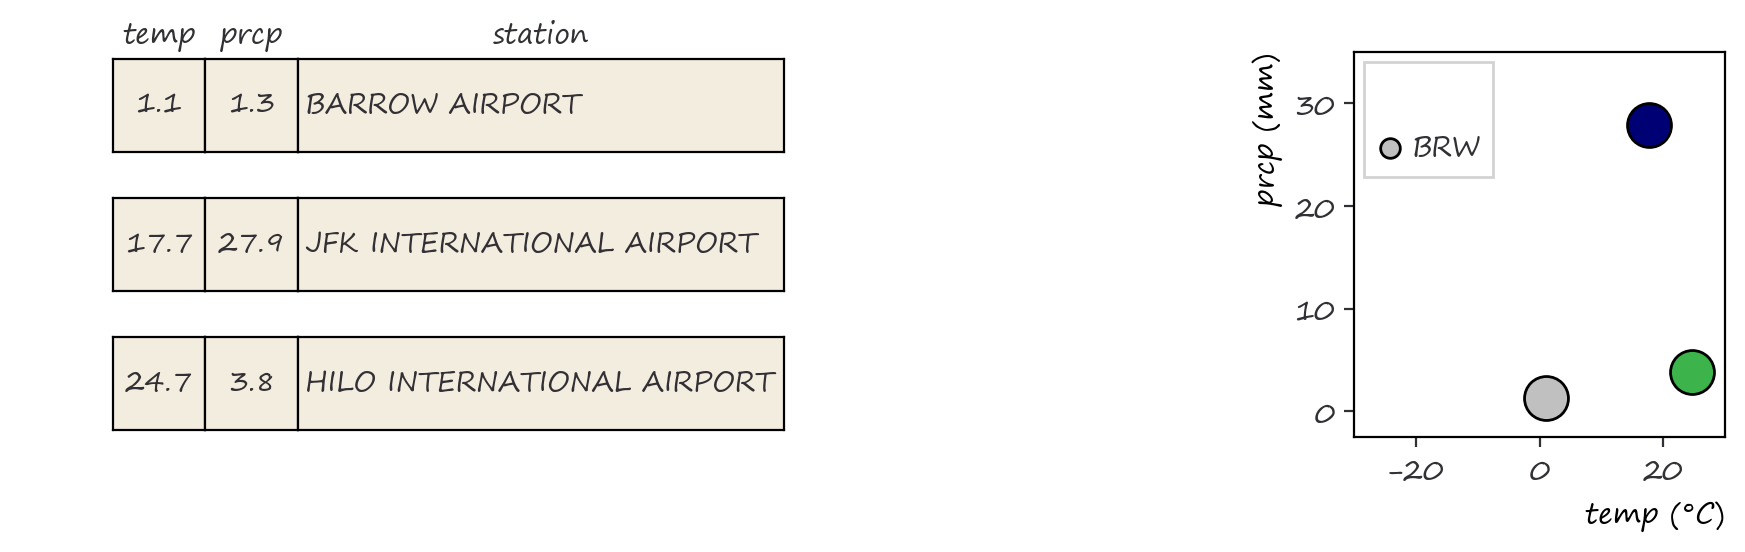

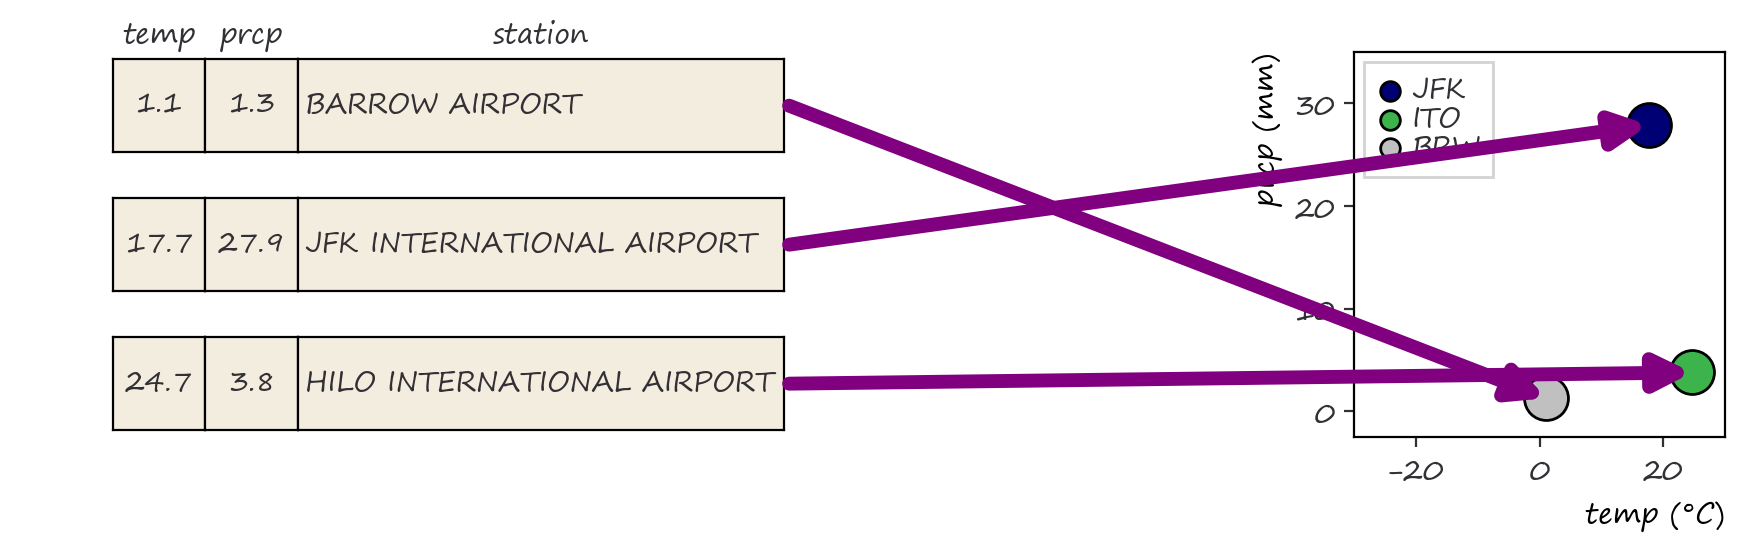

In [47]:
#add forwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=data, 
                          plot_type='scatter', label=None)
dg.table(axd, data)
dg.fake_legend(axd['H'], ['JFK', 'ITO', 'BRW'])
for (yt, xi, yi) in zip(yboxes,x,y):
    darrow = mpatches.ConnectionPatch(xyA=(2.075, yt), coordsA=axd['E'].transAxes, 
                                      xyB=(xi, yi), coordsB=axd['H'].transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=5, color=dg.acolor)
    fig.add_artist(darrow)

fig.savefig(spath/"intro02b.png", facecolor='white', bbox_inches='tight')


plt.show()

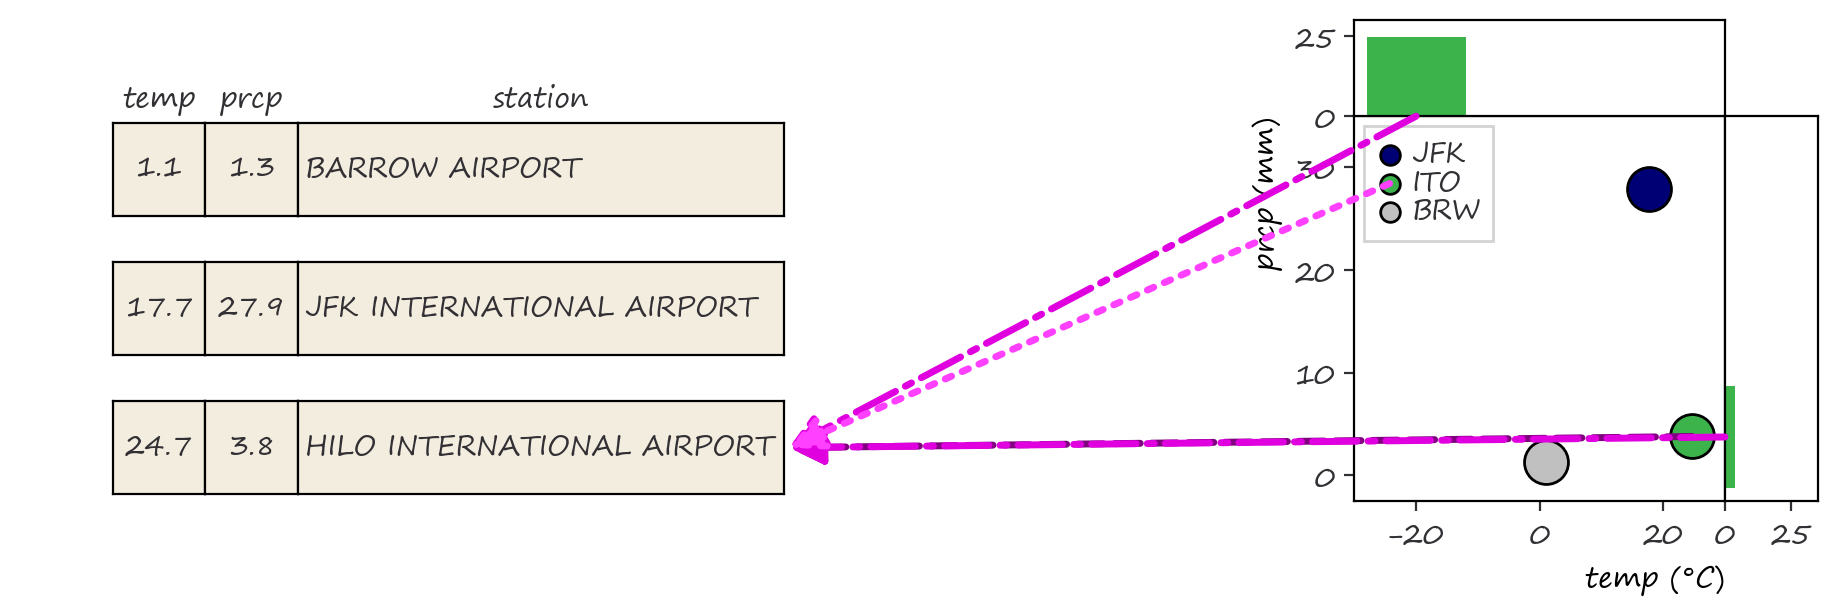

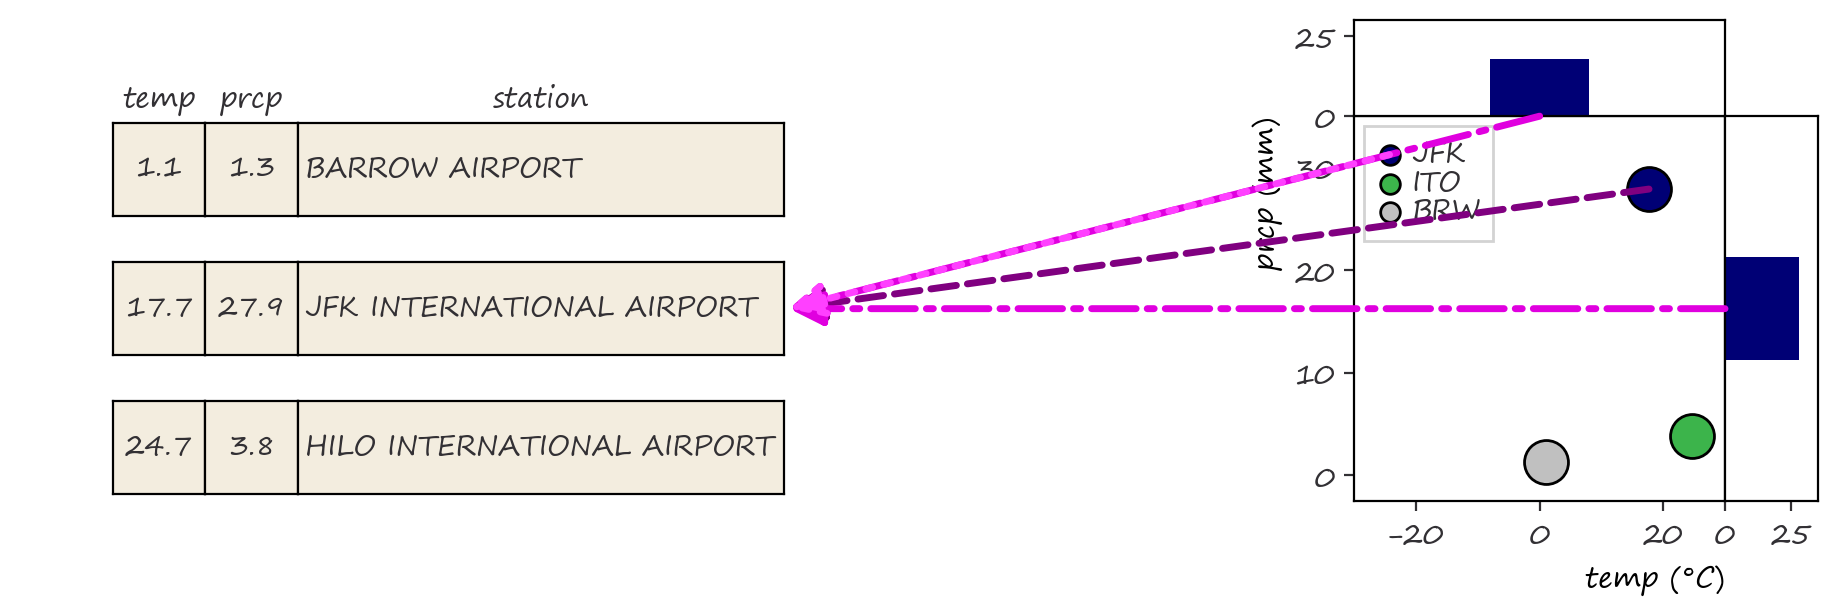

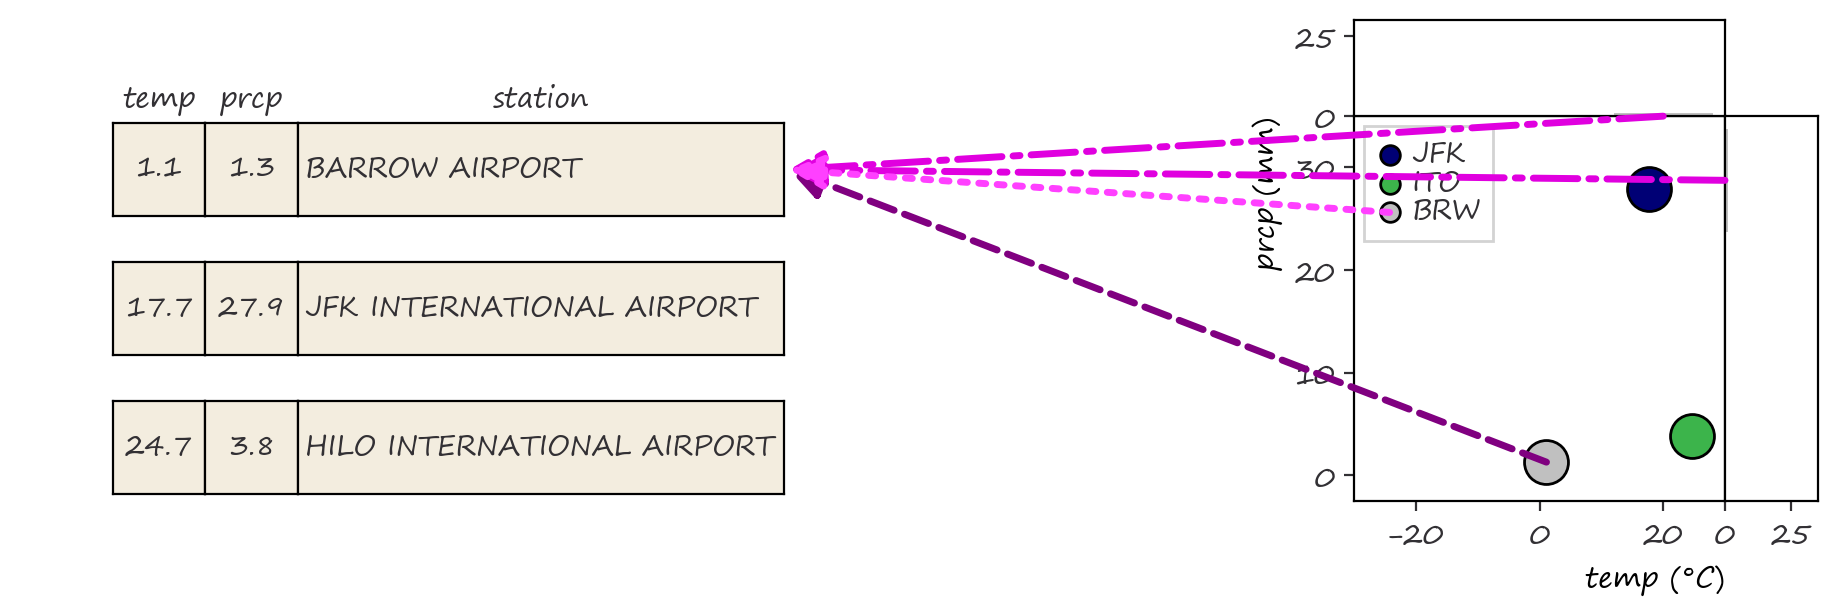

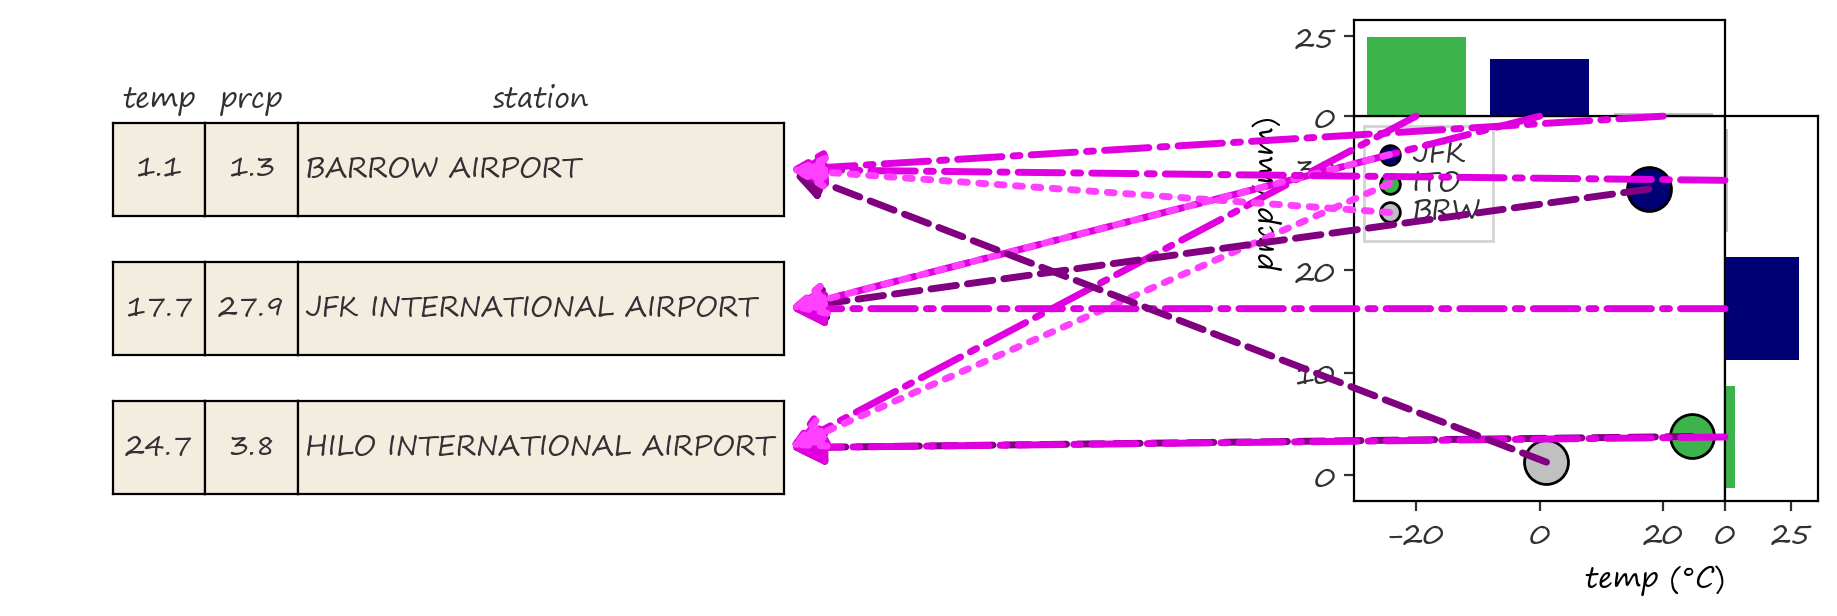

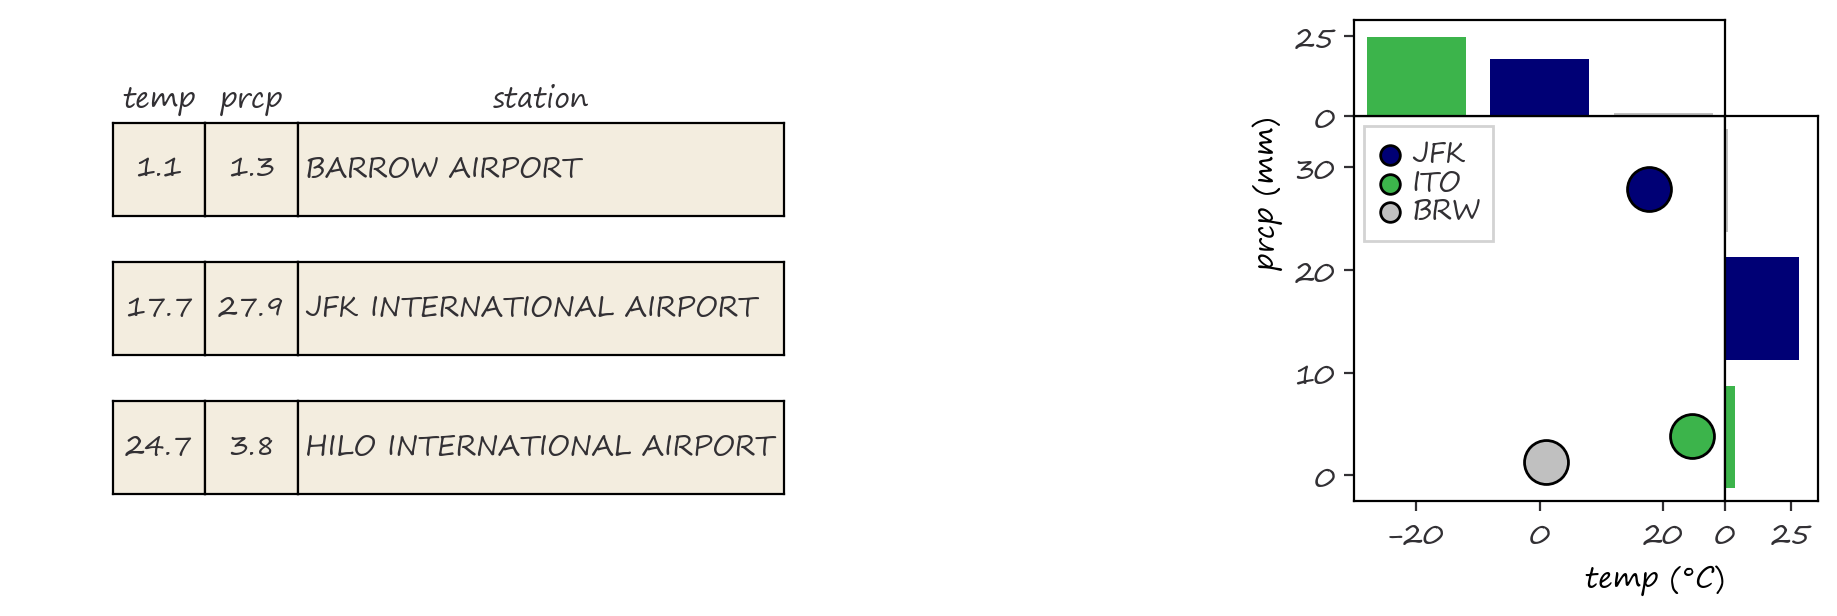

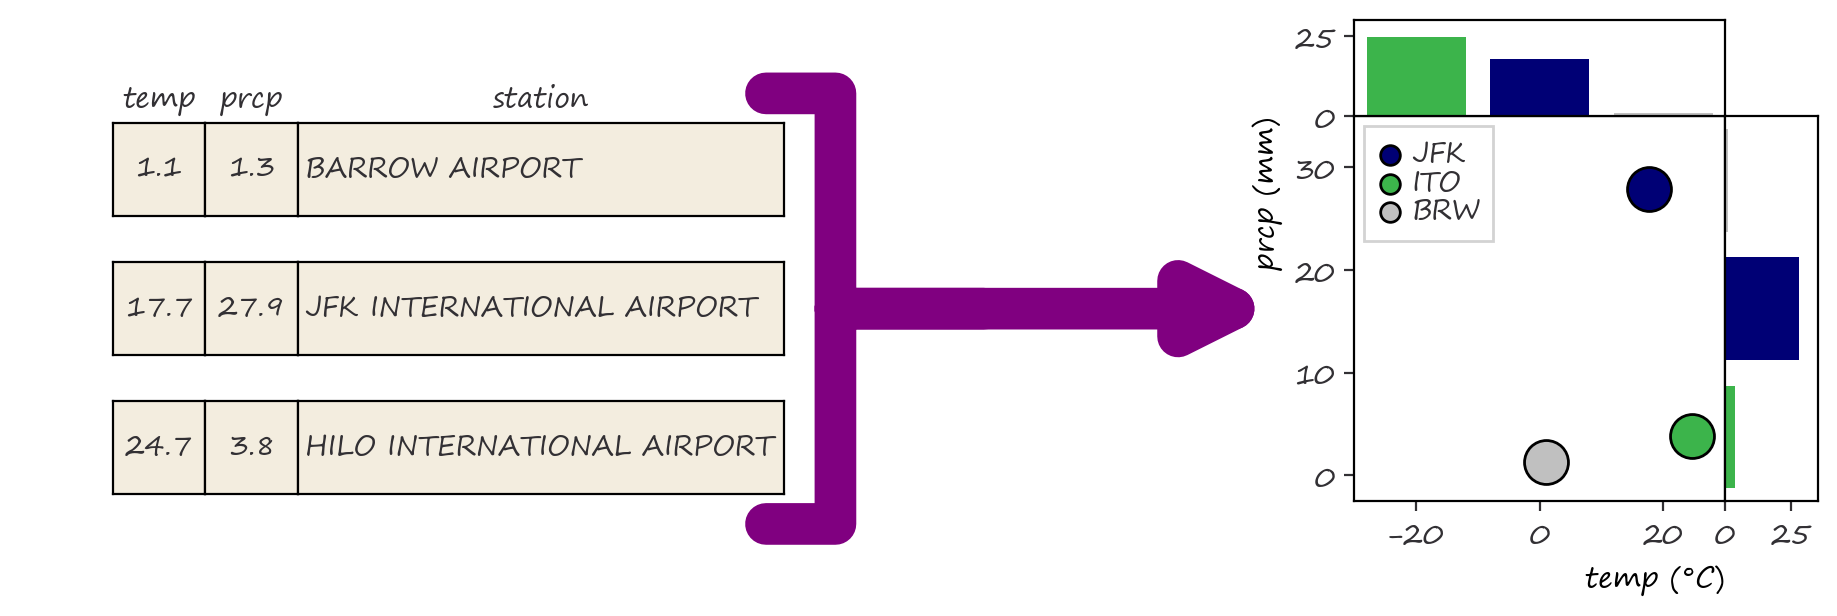

In [63]:

for f in range(6):
    fig, axd = dg.make_figure(artist=False, section=False,
                              visual=False, continuity=False, 
                              data=False, values=data, 
                              plot_type='scatter', label=None)
    
    pos = dg.fake_legend(axd['H'], ['JFK', 'ITO', 'BRW'])
    
        
    axbx = axd['H'].inset_axes([0,1,1,.25], 
                               transform=axd['H'].transAxes, facecolor='white')
    axby = axd['H'].inset_axes([1,0,.25,1], 
                               transform=axd['H'].transAxes, facecolor='white')



    axbx.set(xticks=[], xlim=(-.5, 2.5), ylim=(0, dg.tlim[-1]))
    axby.set(yticks=[], ylim=(-.5, 2.5), xlim=(0, dg.plim[-1]))


    dg.table(axd, data)
    larrow = '#991A99'
    lw = 2.5
    for i, (yt, (t, p, s)) in enumerate((zip(yboxes, data))):
        if f not in [i, 3, 4, 5]: 
            continue
        axbx.bar(i, t[1], facecolor= ip.cdict[s[1]])
        axby.barh(i, p[1], facecolor=ip.cdict[s[1]])
        if f in [4, 5]:
            continue
        darrow = mpatches.ConnectionPatch(xyB=(2.075, yt), coordsB=axd['E'].transAxes, 
                                          xyA=(t[1], p[1]), coordsA=axd['H'].transData, 
                                          mutation_scale=25, arrowstyle='-|>', 
                                         lw=lw, color=dg.acolor, linestyle='--')
        fig.add_artist(darrow)
        xbarrow = mpatches.ConnectionPatch(xyB=(2.075, yt), coordsB=axd['E'].transAxes, 
                                          xyA=(i, 0), coordsA=axbx.transData, 
                                          mutation_scale=25, arrowstyle='-|>', 
                                         lw=lw, color=ch.lighten_color(dg.acolor, .75), linestyle='-.')
        fig.add_artist(xbarrow)
        ybarrow = mpatches.ConnectionPatch(xyB=(2.075, yt), coordsB=axd['E'].transAxes, 
                                          xyA=(0, i), coordsA=axby.transData, 
                                          mutation_scale=25, arrowstyle='-|>', 
                                         lw=lw, color=ch.lighten_color(dg.acolor, .75), linestyle='-.')
        fig.add_artist(ybarrow)

        lgarrow = mpatches.ConnectionPatch(xyB=(2.075, yt), coordsB=axd['E'].transAxes, 
                        xyA=pos[ip.airport_codes[s[-1]]], 
                        coordsA=axd['H'].transAxes, 
                        mutation_scale=25, arrowstyle='-|>', 
                        lw=lw, color=ch.lighten_color(dg.acolor, .5), linestyle=':')
        fig.add_artist(lgarrow)
      
    if f == 5:
        darrow1 = mpatches.ConnectionPatch(xyA=(2.2, .5), coordsA=axd['E'].transAxes, 
                                  xyB=(-.2, .5), coordsB=axd['H'].transAxes, 
                                  mutation_scale=50, arrowstyle='-|>', 
                                 lw=15, color=dg.acolor)
        fig.add_artist(darrow1)
        darrow2 = mpatches.ConnectionPatch(xyA=(2.2, .5), coordsA=axd['E'].transAxes, 
                                  xyB=(-1, .5), coordsB=axd['H'].transAxes, 
                                  mutation_scale=50, arrowstyle=']-,widthA=1.55,lengthA=.5', 
                                 lw=15, color=dg.acolor)
        fig.add_artist(darrow2)
        
    fig.savefig(spath/f"intro04{string.ascii_lowercase[f]}.png", facecolor='white', bbox_inches='tight')
    plt.show()

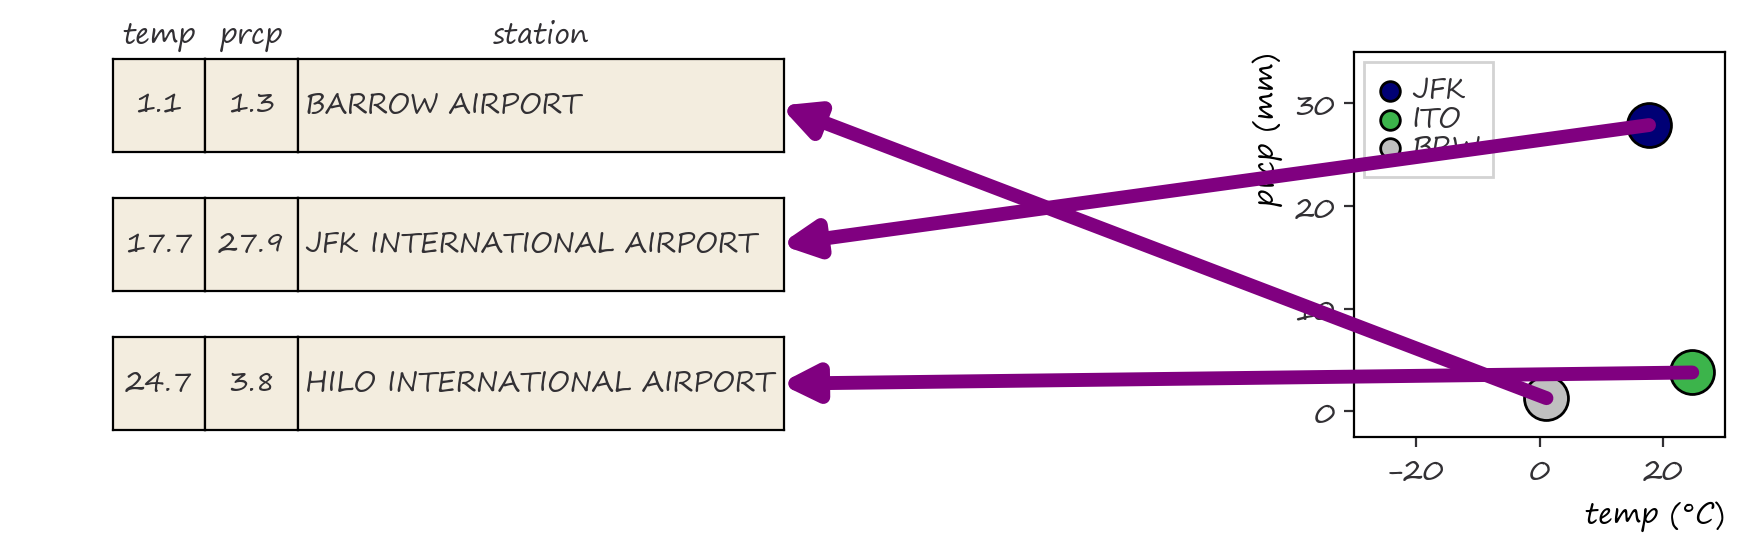

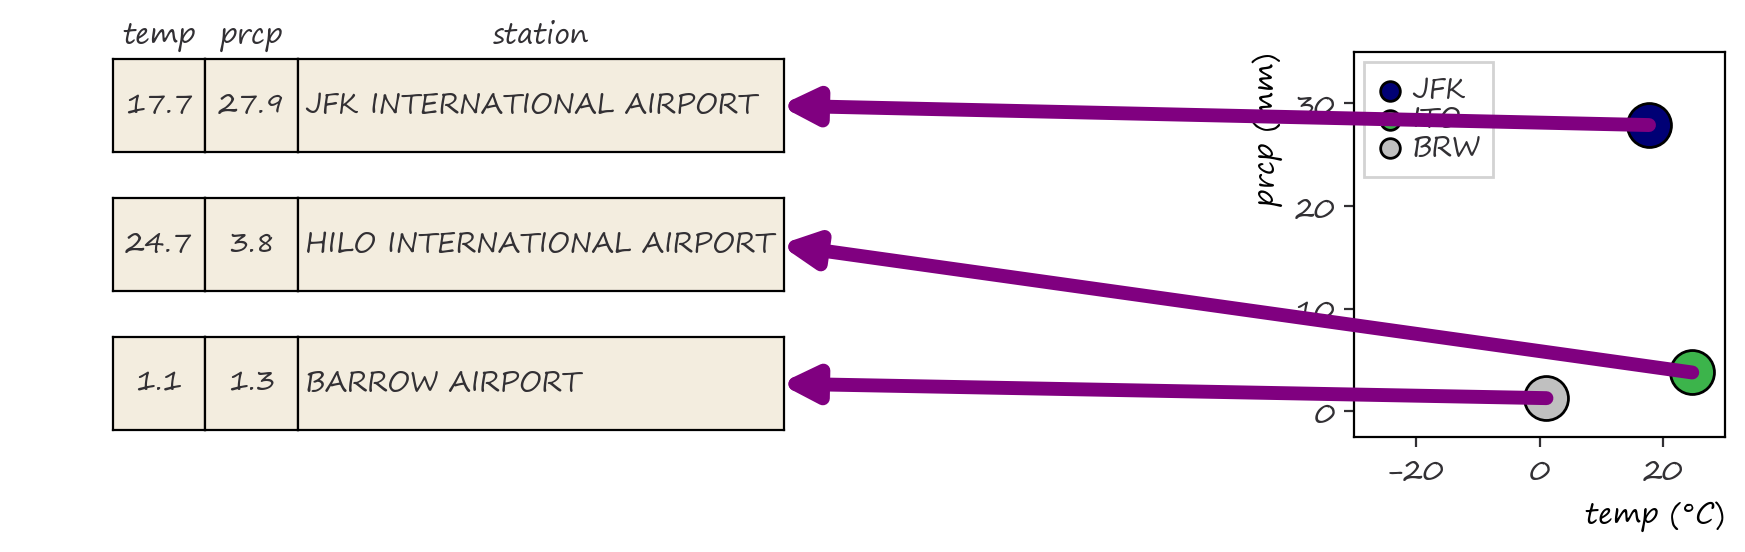

In [67]:
#add backwards arrows + shuffle
for i, d  in enumerate([data, [data[j] for j in [2,0,1]]]): 
    fig, axd = dg.make_figure(artist=False, section=False,
                              visual=False, continuity=False, 
                              data=False, values=d,
                              plot_type='scatter', label=None)
    dg.table(axd, d)
    dg.fake_legend(axd['H'], ['JFK', 'ITO', 'BRW'])
    for yt, (t, p,s) in (zip(yboxes, d)):
        darrow = mpatches.ConnectionPatch(xyB=(2.05, yt), coordsB=axd['E'].transAxes, 
                                          xyA=(t[-1],p[-1]), coordsA=axd['H'].transData, 
                                          mutation_scale=25, arrowstyle='-|>', 
                                         lw=5, color=dg.acolor)
        fig.add_artist(darrow)

    fig.savefig(spath/f"intro04{string.ascii_lowercase[i]}.png", facecolor='white', bbox_inches='tight')

plt.show()

In [68]:
jfk = df[df['NAME'].str.contains('JFK')]
jfkd = jfk[['station', 'PRCP']].copy()
jfkd['date'] = pd.to_datetime(jfk['DATE'])
jfkd = jfkd.set_index('date')

In [69]:
top5 = jfkd.sort_values(by='PRCP', ascending=False).head()

In [70]:
top5

,station,PRCP
date,,
2021-02-01,JFK INTERNATIONAL AIRPORT,33.5
2021-07-03,JFK INTERNATIONAL AIRPORT,27.9
2021-05-28,JFK INTERNATIONAL AIRPORT,27.4
2021-05-30,JFK INTERNATIONAL AIRPORT,23.9
2021-01-16,JFK INTERNATIONAL AIRPORT,22.4


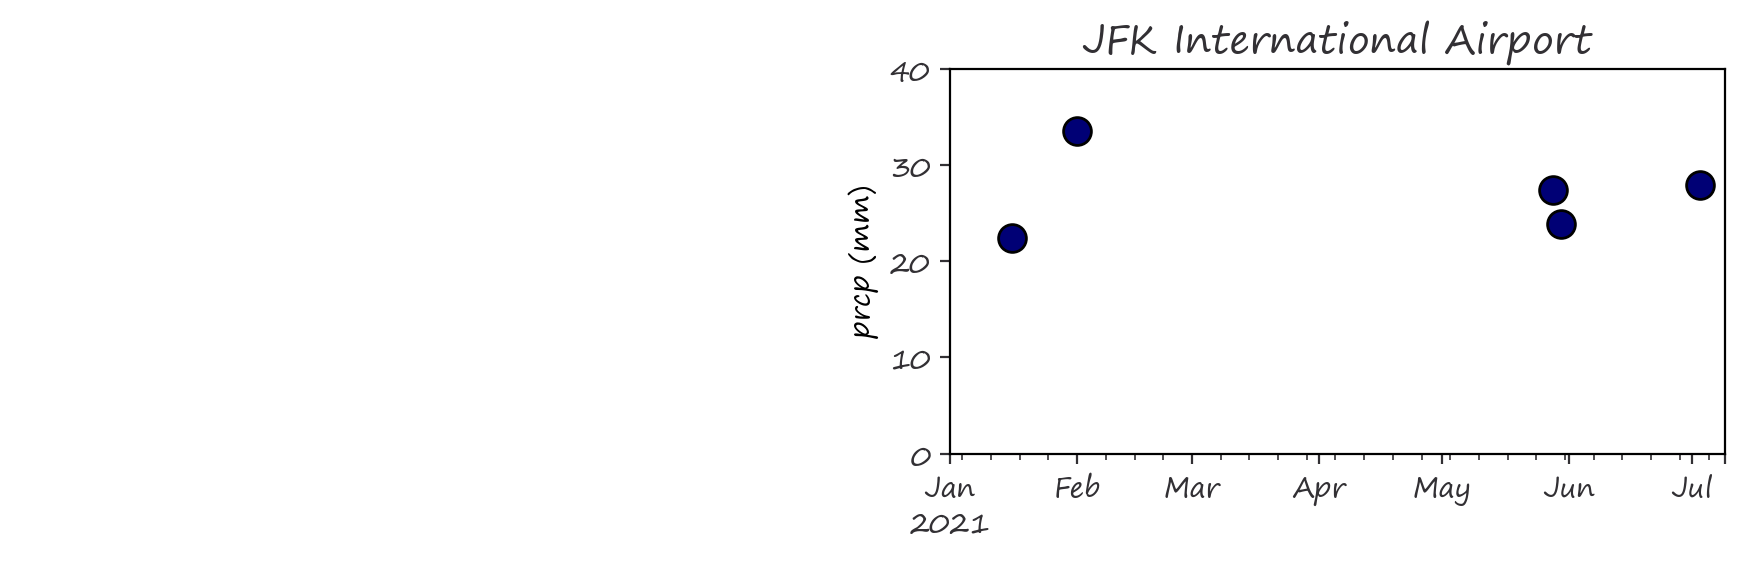

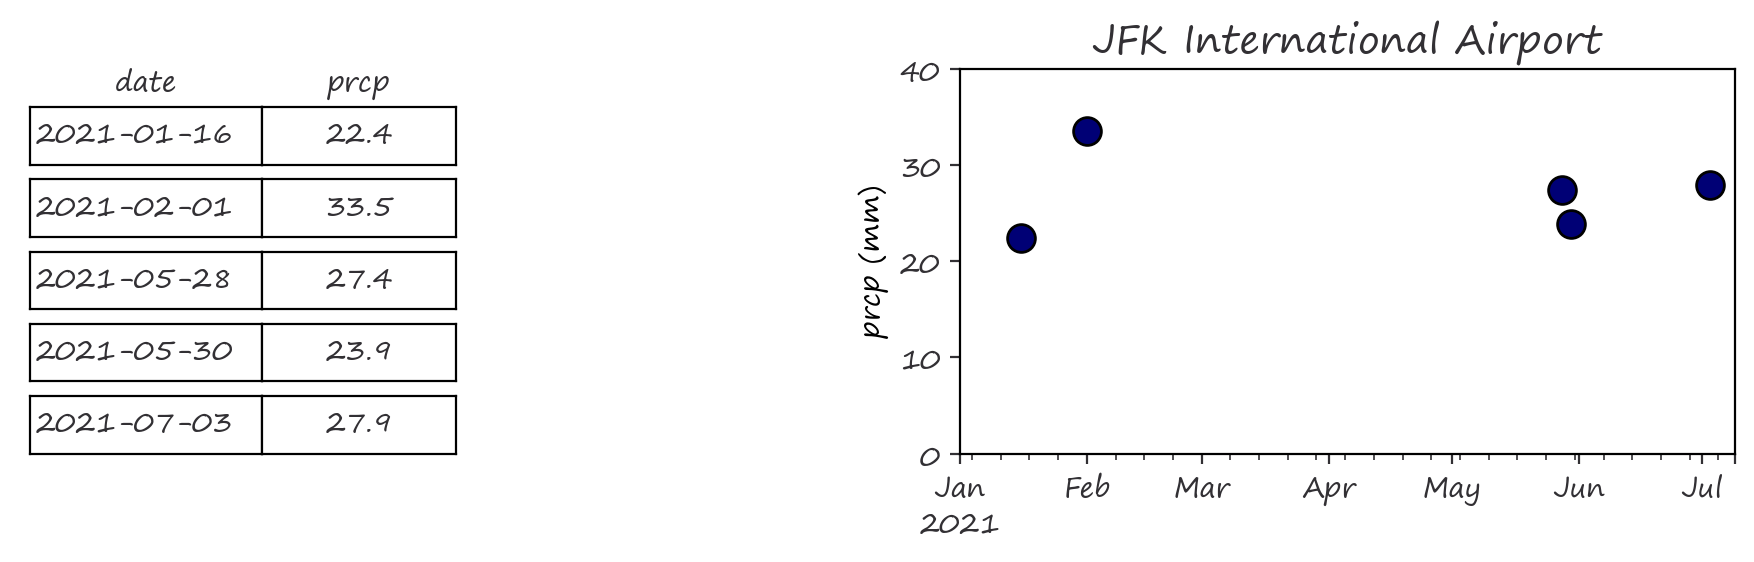

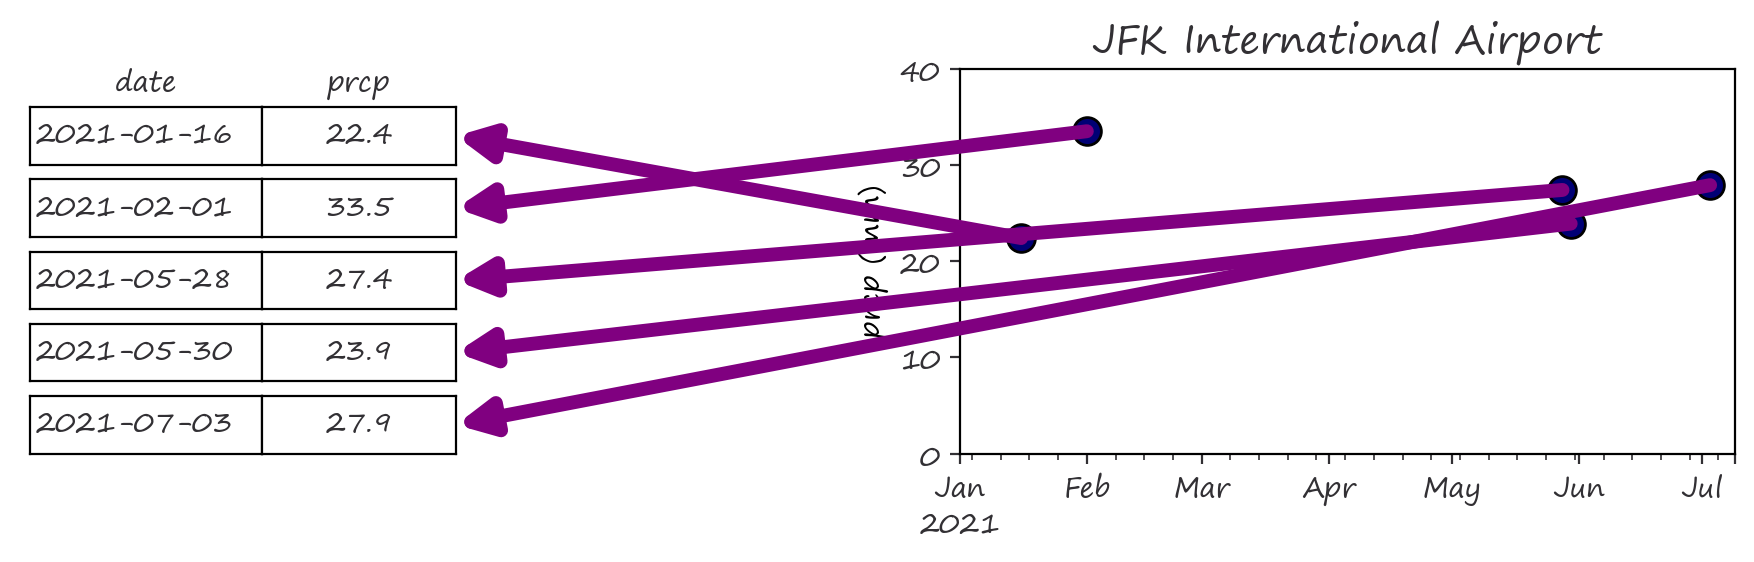

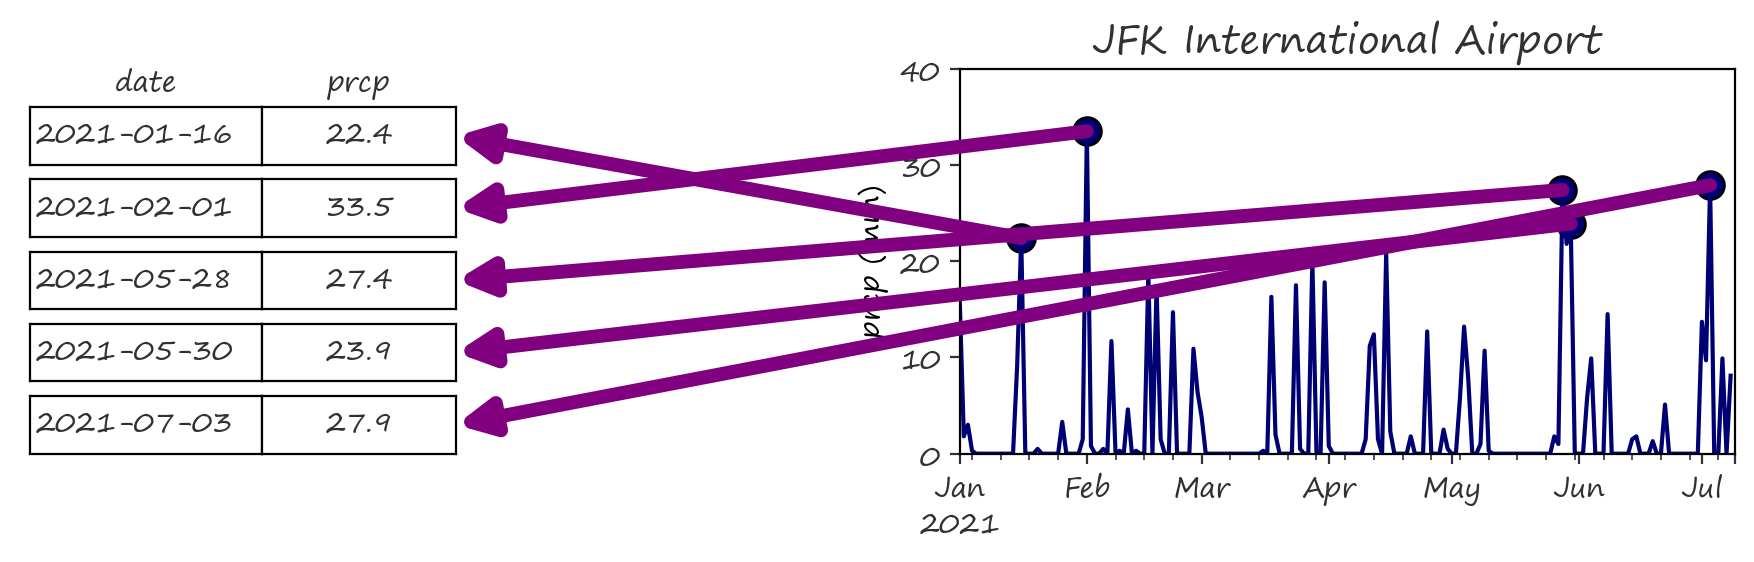

In [121]:
color = ip.cdict['JFK INTERNATIONAL AIRPORT']
for i in range(4):
    fig, axd = plt.subplot_mosaic([['E', 'H']],  figsize = (11, 2.5), facecolor='white')
    sc = axd['H'].scatter(top5.index, top5['PRCP'] , fc=color, ec='k', s=100)
    axd['H'].set(facecolor='white', ylim=(0, dg.plim[-1]+5))
    jfkd['PRCP'].plot(color='white', ax=axd['H'], zorder=-1)
    axd['H'].set(ylabel='prcp (mm)', xlabel="")
    axd['H'].set_title('JFK International Airport', fontsize=14)
    
    axd['E'].axis('off')
    axd['E'].set_facecolor('white')
    
    if i>0:   
        h = .15
        y = 0
        yboxes = [y+h/2]
        for k, (j, row) in enumerate(top5.sort_values(by='date', ascending=False).iterrows()):
            x = 0
            wo = .3
            axdate = axd['E'].inset_axes([x,y,wo,h], facecolor='white')
            axdate.text(0.025, .5, j.date(), 
                        transform=axdate.transAxes, 
                       ha='left', va='center')
            axdate.set(xticks=[], yticks=[])
            
            axv = axd['E'].inset_axes([x+wo,y,.25,h], facecolor='white')
            axv.text(.5, .5, row['PRCP'], 
                        transform=axv.transAxes, 
                       ha='center', va='center')
            axv.set(xticks=[], yticks=[])
            
            if k == len(top5)-1:
                axdate.set_title('date', fontsize=10, rotation=0)
                axv.set_title('prcp', fontsize=10, rotation=0)
                
            y+=1.25*h
            yboxes.append(y+h/2)
            
    if i>1: # this has some weird unit conversion buggyness going on
        for yt, xy in zip(yboxes[:-1][::-1], sorted(sc.get_offsets(), key=lambda p:p.data[0])):
            darrow = mpatches.ConnectionPatch(xyB=(0.55,yt), 
                                              coordsB=axd['E'].transAxes, 
                                              xyA=xy, 
                                              coordsA=axd['H'].transData, 
                                          mutation_scale=25, arrowstyle='-|>', 
                                        lw=5, color=dg.acolor)
            fig.add_artist(darrow)
    if i> 2:
        jfkd['PRCP'].plot(color=color, ax=axd['H'])
        axd['H'].set(ylabel='prcp (mm)', xlabel="")
       
        
    fig.savefig(spath/f"intro05{string.ascii_lowercase[i]}.png", facecolor='white', bbox_inches='tight')
plt.show()

In [137]:
N=50
def cycle(k):
    return np.hstack([np.linspace(points[k].iloc[a], points[k].iloc[b], N) for a,b in ([0,1],[1,2],[2,0])])

In [172]:
N = 50
xv = cycle('TAVG')
yv = cycle('PRCP')
cv = np.linspace(0, 1, N*3)
xy = np.array([xv, yv]).T.reshape(-1, 1, 2)
segments = np.concatenate([xy[:-1], xy[1:]], axis=1)
cmap = ch.get_continuous_cmap([ip.cdict[c[0]], ip.cdict[c[1]], ip.cdict[c[2]]])
norm = mcolors.BoundaryNorm(cv, cmap.N)

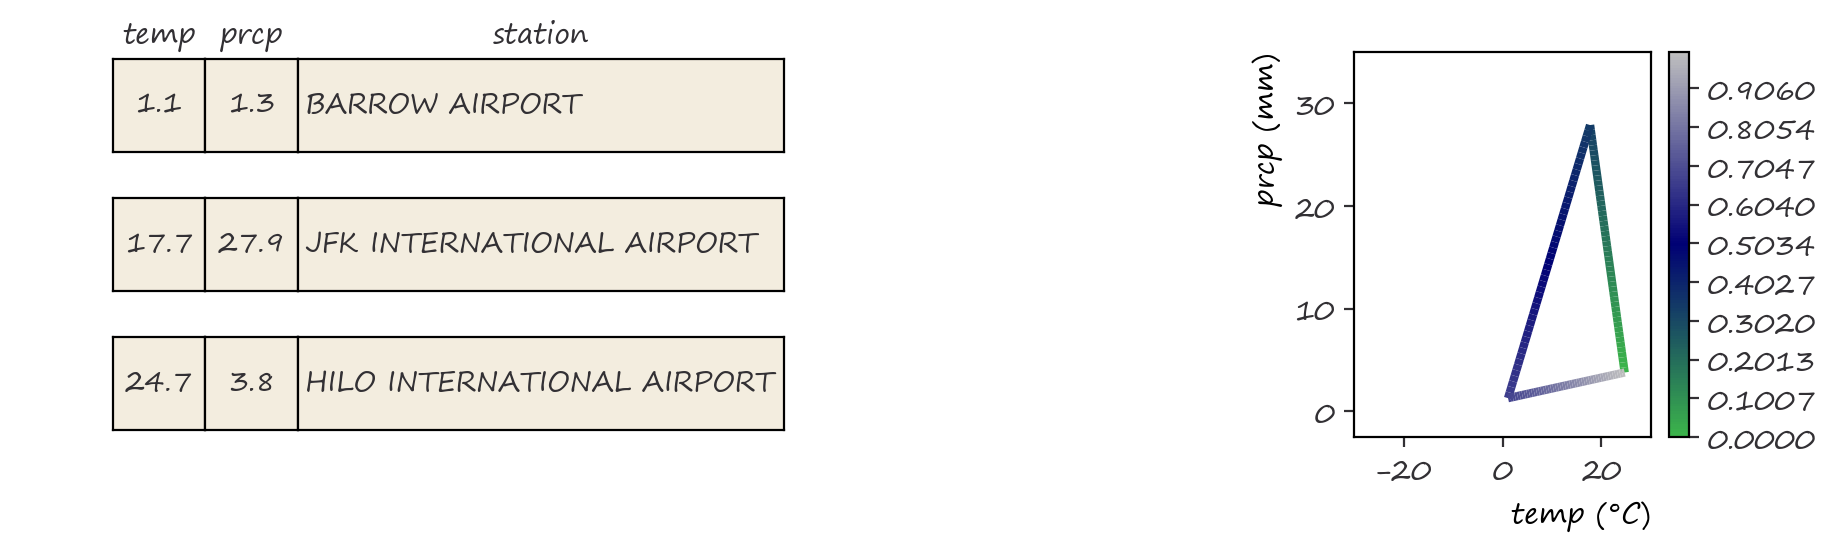

In [173]:
#same arrows as above + middle?
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=data, 
                          plot_type='line', label=None)
dg.table(axd, data)


lc = mcoll.LineCollection(segments, lw=3, cmap=cmap, norm=norm)
lc.set_array(cv)
line = axd['H'].add_collection(lc)
#cax = axd['H'].inset_axes([103, 0, 5, 1.25], transform=axd['H'].transData)
#cb = fig.colorbar(line, cax=cax, ticks=[0,1])
fig.colorbar(line)
#cb.set_ticklabels(['JFK', 'LGA'])
fig.savefig(spath/"intro05.png", facecolor='white', bbox_inches='tight')


plt.show()

In [174]:
#same arrows as above + middle?
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='line', label=None)
dg.table(axd, dtwo)


lc = mcoll.LineCollection(segments, lw=3, cmap=cmap, norm=norm)
lc.set_array(cv[::-1])
line = axd['H'].add_collection(lc)
cax = axd['H'].inset_axes([103, 0, 5, 1.25], 
                          transform=axd['H'].transData)
cb = fig.colorbar(line, cax=cax, ticks=[0,1])
cb.set_ticklabels(['JFK', 'LGA'])
for (yt, xi, yi) in zip(yboxes,x,y):
    darrow = mpatches.ConnectionPatch(xyB=(1, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(xi, yi), coordsA=axd['H'].transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=5, color=dg.acolor)
    fig.add_artist(darrow)
fig.savefig(spath/"intro05a.png", facecolor='white', bbox_inches='tight')


plt.show()

NameError: name 'dtwo' is not defined

In [ ]:
#same arrows as above + middle?
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='line', label=None)
dg.table(axd, dtwo)


lc = mcoll.LineCollection(segments, lw=3, cmap=cmap, norm=norm)
lc.set_array(cv[::-1])
line = axd['H'].add_collection(lc)
cax = axd['H'].inset_axes([103, 0, 5, 1.25], 
                          transform=axd['H'].transData)
cb = fig.colorbar(line, cax=cax, ticks=[0,1])
cb.set_ticklabels(['JFK', 'LGA'])
for (yt, xi, yi) in zip(yboxes,x,y):
    darrow = mpatches.ConnectionPatch(xyB=(1, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(xi, yi), coordsA=axd['H'].transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=5, color=dg.acolor)
    fig.add_artist(darrow)
    

step = 7

ym = .475
marrow = mpatches.ConnectionPatch(xyB=(1, ym), coordsB=axd['E'].transAxes, 
                                  xyA=(xv[int(len(xv)/2)], yv[int(len(yv)/2)]),
                                  coordsA=axd['H'].transData, 
                                  mutation_scale=25, arrowstyle='-|>', 
                                 lw=.5, linestyle='--', color=dg.acolor)
fig.add_artist(marrow)
    
w = h = .25
yb = ym - w/2   
xb =.25 
for i in range(3):
    axsub = axd['E'].inset_axes([xb,yb,w,h], 
                                transform=axd['E'].transData)
    axsub.patch.set_alpha(.5)
    axsub.set(xticks=[], yticks=[])
    axsub.text(.5, .5, '?', 
                transform=axsub.transAxes, 
               ha='center', va='center', fontsize=18)
    xb+=w
    
    
fig.savefig(spath/"intro05b.png", facecolor='white', bbox_inches='tight')


plt.show()

In [ ]:
#add forwards arrows
#add forwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', label=None)
dg.table(axd, dtwo)

for (yt, xi, yi) in zip(yboxes,x,y):
    darrow = mpatches.ConnectionPatch(xyA=(1.08, yt), coordsA=axd['E'].transAxes, 
                                      xyB=(xi, yi), coordsB=axd['H'].transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=10, color=dg.acolor)
    fig.add_artist(darrow)

fig.savefig(spath/"intro06.png", facecolor='white', bbox_inches='tight')

plt.show()

In [ ]:
shift = 25
dthree = []
for row in dtwo:
    d = dict(row)
    d['temp'] = d['temp']+ shift
    dthree.append(list(d.items()))
dthree

In [ ]:
#add equivariance arrows
for s in [0,1,2]:
    fig = plt.figure(facecolor='white', figsize=(11,5))
    fig0, fig1 = fig.subfigures(2, 1, facecolor='white')

    fig0, axd = dg.make_figure(artist=False, section=False,
                              visual=False, continuity=False, 
                              data=False, values=dtwo, 
                              plot_type='scatter', fig=fig0, label=None)
    dg.table(axd, dtwo)

    for (yt, xi, yi) in zip(yboxes,x,y):
        darrow = mpatches.ConnectionPatch(xyA=(1.08, yt), coordsA=axd['E'].transAxes, 
                                          xyB=(xi, yi), coordsB=axd['H'].transData, 
                                          mutation_scale=25, arrowstyle='-|>', 
                                         lw=10, color=dg.acolor)
        fig0.add_artist(darrow)

    fig1, axd1 = dg.make_figure(artist=False, section=False,
                              visual=False, continuity=False, 
                              data=False, values=dthree, 
                              plot_type='scatter', fig=fig1, label=None)
    if s==0:
        axd1['H'].set_visible(False)
    
    dg.table(axd1, dthree)

    xx = .25 + .25/2
    tarrow = mpatches.ConnectionPatch(xyA=(xx, 0.05), coordsA=axd['E'].transAxes, 
                                          xyB=(xx, .95), coordsB=axd1['E'].transAxes, 
                                          mutation_scale=25, arrowstyle='-|>', 
                                         lw=10, color=dg.ecolor)
    fig1.add_artist(tarrow)

    fig1.text(xx+.1, 1.1, f'+ {shift}°F', transform=axd1['E'].transAxes, 
              va='center', ha='left', color=dg.ecolor, fontsize=20)
    
    if s>0:
        for (yt, xi, yi) in zip(yboxes,x+shift,y):
            darrow = mpatches.ConnectionPatch(xyA=(1.08, yt), coordsA=axd1['E'].transAxes, 
                                              xyB=(xi, yi), coordsB=axd1['H'].transData, 
                                              mutation_scale=25, arrowstyle='-|>', 
                                             lw=10, color=dg.acolor)
            fig1.add_artist(darrow)

    if s>1:
        for (xi, yi) in zip(x, y):
            tvarrow = mpatches.ConnectionPatch(xyA=(xi, yi-.125), coordsA=axd['H'].transData, 
                                              xyB=(xi+shift, yi+.02), coordsB=axd1['H'].transData, 
                                              mutation_scale=25, arrowstyle='-|>', 
                                             lw=10, color=dg.ecolor)
            fig1.add_artist(tvarrow)
    
        fig1.text(3.95, 1.1, f'+ {shift}', transform=axd1['E'].transAxes, 
              va='center', ha='right', color=dg.ecolor, fontsize=20)

   

    fig.savefig(spath/f"intro06{['a','b', 'c'][s]}.png", facecolor='white', bbox_inches='tight')


plt.show()

In [ ]:
done = [dtwo[0]]

In [ ]:
fig, axd = dg.make_figure(artist=False, section=False, 
                          visual=False, continuity=False, 
                          data=True, values=dtwo, label=None)
fig.savefig(spath/"math01.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=False, section=True,
                          visual=False, continuity=False, 
                          data=True, values=dtwo, 
                          fiber=True, label=['E', 'H'])
fig.savefig(spath/"math02.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=False, section=True, 
                          visual=False, continuity=True,
                          data=True, values=done, 
                          label=['E', 'H'])
fig.savefig(spath/"math03.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=False, section=True, 
                          visual=True, continuity=True, 
                          data=done, values=done,
                          label=['E', 'V', 'H'])
fig.savefig(spath/"math04.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=True, section=True,
                          visual=True, continuity=True, 
                          data=True, values=done, 
                          label=['E', 'V', 'H'])
fig.savefig(spath/"math05.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=True, section=True, 
                          visual=True, continuity=True, 
                          data=True, values=done,
                          label=['E', 'V', 'V*', 'H'])
fig.savefig(spath/"math06.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots()
dg.fake_legend(ax, ['JFK', 'LGA', 'ITO'])
ax.set(xlim=dg.tlim, ylim=dg.plim)
plt.show()

In [ ]:
n = 2
h = n/10
y = .975-n/10
yp = np.linspace(y+.025, 1-.025, n)

In [ ]:
y

In [ ]:
y+.025, 1-.025

In [ ]:
4/10/4